In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
houseprice = [[2600,550000],[3000,565000],[3200,610000],[3600,680000],[4000,725000]]
df = pd.DataFrame(houseprice,columns = ['area','price'])
df.head(2)

,area,price
0,2600,550000
1,3000,565000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [5]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


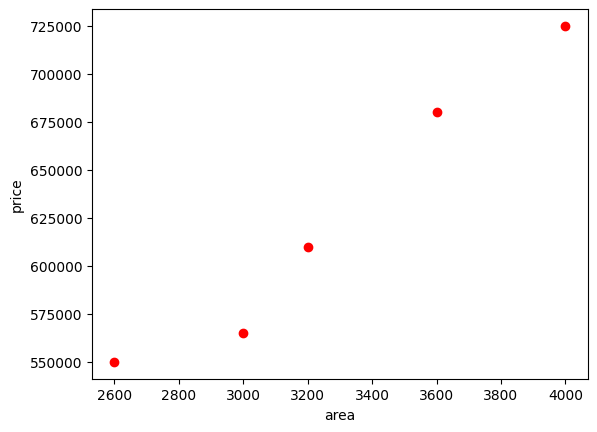

In [13]:
plt.xlabel("area")
plt.ylabel("price")
plt.plot(df.area,df.price,'o',color = 'r')


<Axes: xlabel='area', ylabel='price'>

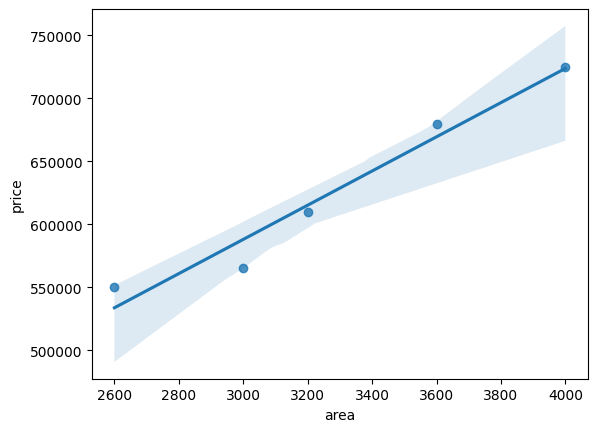

In [14]:
sns.regplot(x='area',y='price',data = df)

In [33]:
x = df.drop('price',axis = 'columns')
x.values

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]], dtype=int64)

In [27]:
y = df.drop('area',axis = 'columns')
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x.values,y.values)

LinearRegression()

In [43]:
reg.predict([[3300],[4000]])

array([[628715.75342466],
       [723767.12328767]])

In [44]:
reg.coef_

array([[135.78767123]])

In [46]:
sample_area = [1000,1200,1700,2100,2700,3200,3800,4500,5200]
df1 = pd.DataFrame(sample_area,columns=['area'])
df1

,area
0,1000
1,1200
2,1700
3,2100
4,2700
5,3200
6,3800
7,4500
8,5200


In [50]:
p = reg.predict(df1.values)

In [53]:
df1['price'] = p
df1

,area,price
0,1000,316404.109589
1,1200,343561.643836
2,1700,411455.479452
3,2100,465770.547945
4,2700,547243.150685
5,3200,615136.986301
6,3800,696609.589041
7,4500,791660.958904
8,5200,886712.328767


Multivariable regression



Below is the table containing home prices in monroe to NJ . Here price depends on area (square feet), bed rooms and age of the home

(in years) . Given these prices we have to predict prices of new homes based on area,bed rooms and age.

In [55]:

data = [[2600,3,20,550000],[3000,4,15,565000],[3200,np.nan,18,610000],[3600,3,30,595000],[4000,5,8,760000],[4100,6,8,810000]]

In [64]:
df = pd.DataFrame(data,columns=['area','bedrooms','age','price'])
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [66]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [68]:
df1 = df.dropna(axis = 0)

In [69]:
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [70]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [71]:
df2 = df.copy()

In [72]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [73]:
df2['bedrooms'] = df2['bedrooms'].fillna(df2['bedrooms'].mean())

In [77]:
df2.dropna(axis = 0,inplace =True,how='any')

In [78]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [85]:
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
dtype: bool

In [82]:
df2 = pd.concat([df2]*2,ignore_index = True)

In [83]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,2600,3.0,20,550000
7,3000,4.0,15,565000
8,3200,4.2,18,610000
9,3600,3.0,30,595000


In [92]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [106]:
reg = LinearRegression()
x = df.drop('price',axis = 1)
y = df['price']
reg.fit(x.values,y.values)

LinearRegression()

In [99]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [100]:
reg.intercept_

221323.0018654043

In [108]:
reg.predict([[3000,3,40]])

array([498408.25158031])

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8
